In [2]:
%%capture
%matplotlib notebook

try:
    from importlib import reload
except ImportError:
    # assume this is python2
    pass
    
import parse_perf as pf
import parse_log as pl
import parse_nvvp as pn
import plotutils as pu
import pandas as pd
import matplotlib.pyplot as plt

for m in [pf, pl, pu, pn]:
    reload(m)

In [129]:
grouped2

,sum,mean,std,min,median,max
name,,,,,,
after-accept,47614.0,0.379473,0.498927,0.0,0.0,38.0
after-snapshot,1948812.0,15.531600,13.947274,7.0,9.0,1000.0
after-sort,3841014.0,30.612031,23.113430,15.0,19.0,1016.0
after-sched,24403254.0,194.488531,210.877145,34.0,149.0,38345.0
without-wait,28062498.0,223.651896,222.198760,42.0,173.0,38354.0
sched-iter,81457709.0,649.199906,65593.488539,61.0,272.0,22888346.0


In [130]:
grouped

,sum,mean,std,min,median,max
name,,,,,,
after-accept,13465.0,0.417882,1.165813,0.0,0.0,190.0
after-snapshot,941370.0,29.215133,24.245868,7.0,21.0,954.0
after-sort,1791340.0,55.593694,38.732363,15.0,46.0,967.0
after-sched,14144949.0,438.984203,2089.294325,35.0,233.0,37037.0
without-wait,15623624.0,484.874434,2090.707254,43.0,275.0,37100.0
sched-iter,18810235.0,583.769940,2098.899299,84.0,353.0,37367.0


<IPython.core.display.Javascript object>


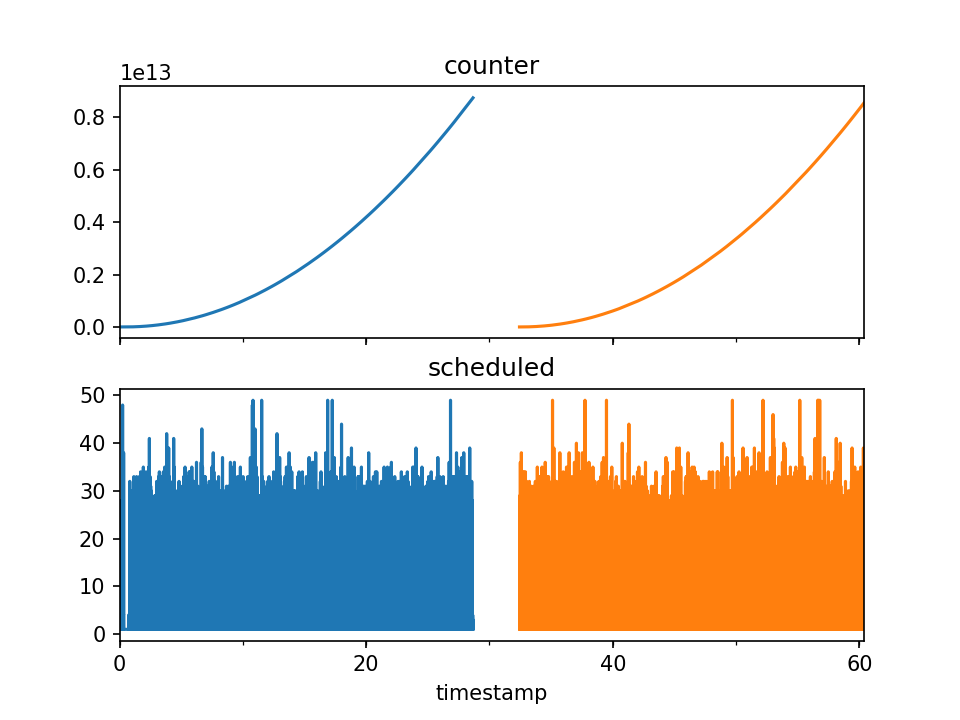

removeZeros: False for counter
removeZeros: True for scheduled


In [136]:
pf.preprocesse('../tests/try5/debugging_alone')
logs2 = pf.load_file('../tests/try5/debugging_alone/timing.output')
grouped2, df2 = pf.perfcalls(logs2)
grouped2 = grouped2.reindex(['after-accept', 'after-snapshot', 'after-sort', 'after-sched', 'without-wait', 'sched-iter'])

logs = pf.load_file('../tests/try5/debugging_alone/sessiter.output')
df, fig = pf.session_counters(logs, colnames=['counter', 'scheduled'])

<IPython.core.display.Javascript object>


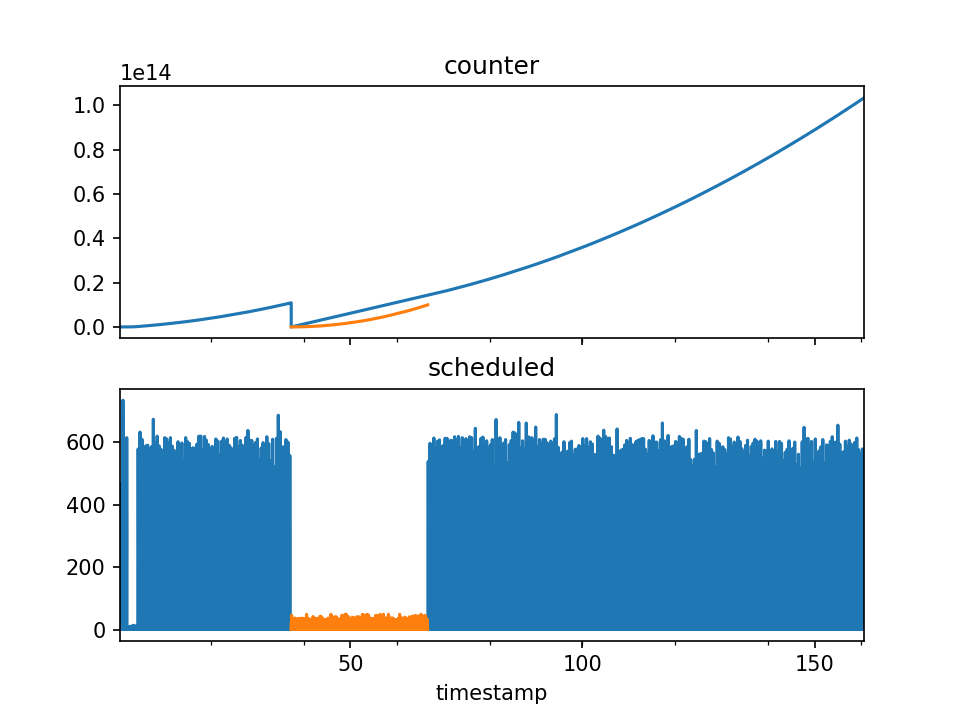

removeZeros: False for counter
removeZeros: True for scheduled


In [137]:
pf.preprocesse('../tests/try5/debugging')
logs = pf.load_file('../tests/try5/debugging/timing.output')
grouped, df = pf.perfcalls(logs)

# only show the portion with alexnet
df.index = df.index - df.index[0]
df = df[df.index > pd.Timedelta('40s')]
df = df[df.index < pd.Timedelta('60s')]
grouped = df.groupby('name').agg({ 'time': ['sum', 'mean', 'std', 'min', 'median', 'max'] })
# Using ravel, and a string join, we can create better names for the columns:
grouped.columns = [x[-1] for x in grouped.columns.ravel()]
grouped = grouped.sort_values(by=['sum', 'mean'], ascending=False)
grouped = grouped.reindex(['after-accept', 'after-snapshot', 'after-sort', 'after-sched', 'without-wait', 'sched-iter'])

logs = pf.load_file('../tests/try5/debugging/sessiter.output')
df, fig = pf.session_counters(logs, colnames=['counter', 'scheduled'])

<IPython.core.display.Javascript object>


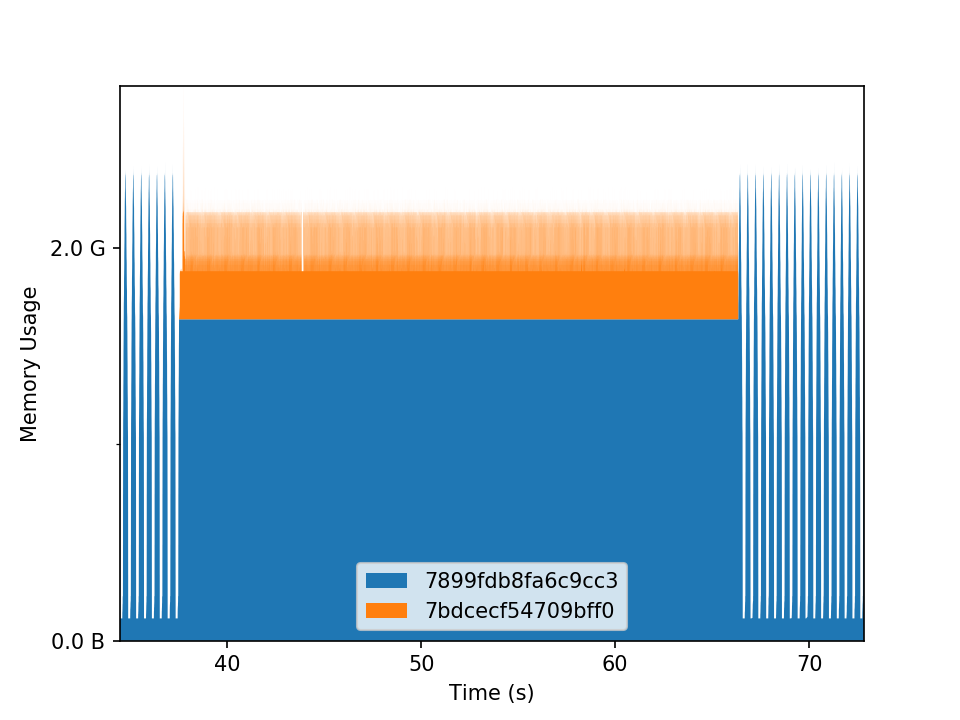

In [123]:
logs = pl.load_file('../tests/try3/debugging/alloc.output')
df, _, fig = pl.memory_usage(logs, per_sess=True, mem_type='GPU_0_bfc')

<IPython.core.display.Javascript object>


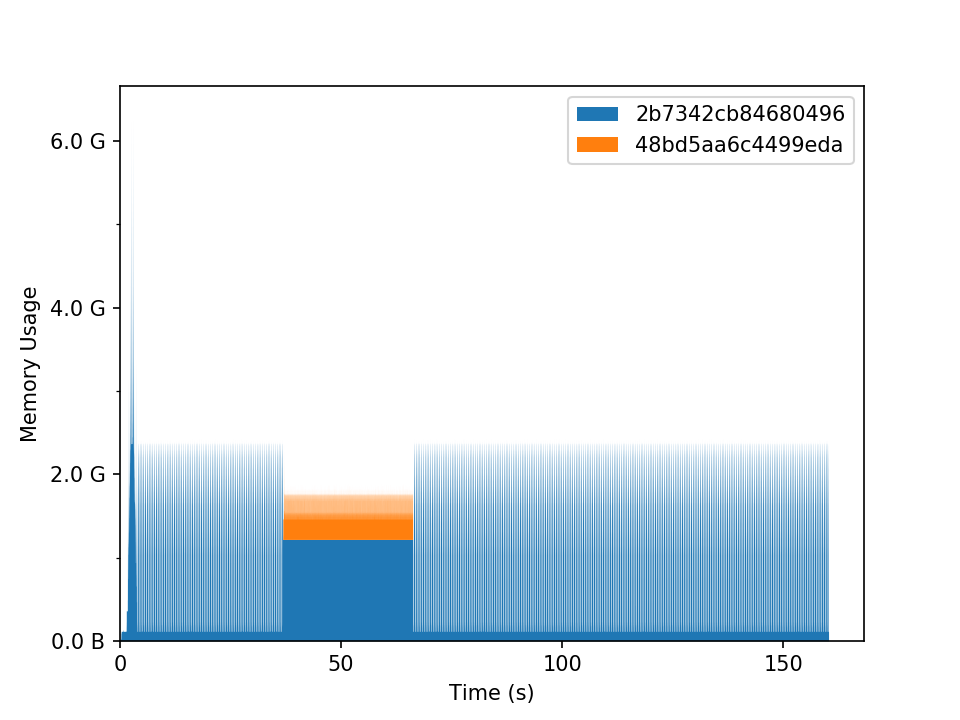

In [135]:
logs = pl.load_file('../tests/try5/debugging/alloc.output')
df, _, fig = pl.memory_usage(logs, per_sess=True, mem_type='GPU_0_bfc')

<IPython.core.display.Javascript object>


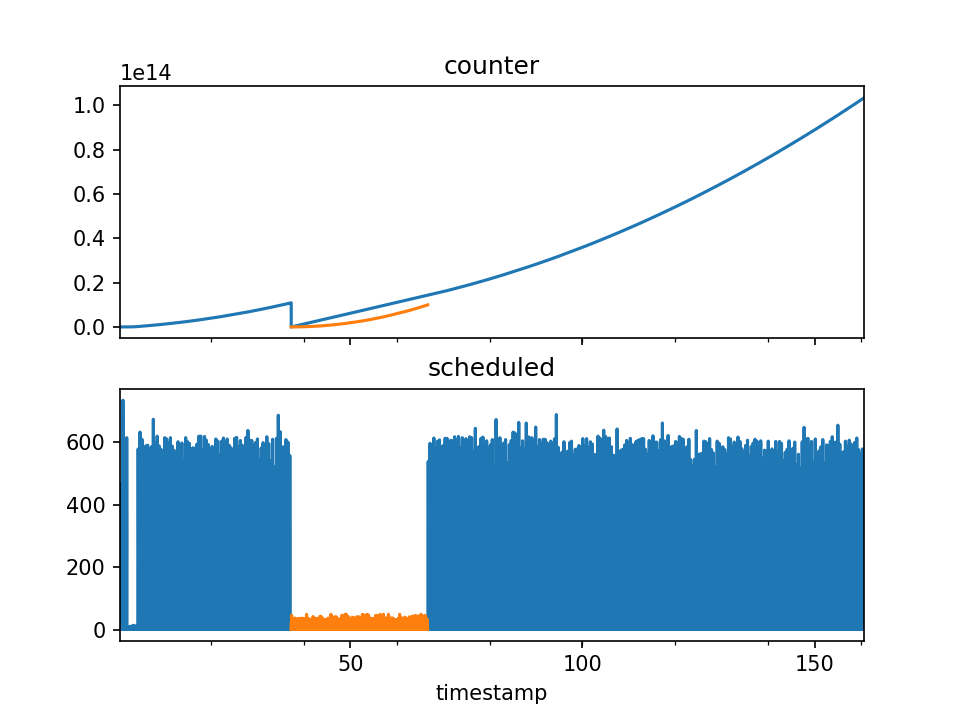

removeZeros: False for counter
removeZeros: True for scheduled


In [134]:
pf.preprocesse('../tests/try5/debugging')
logs = pf.load_file('../tests/try5/debugging/sessiter.output')
df, fig = pf.session_counters(logs, colnames=['counter', 'scheduled'])

<IPython.core.display.Javascript object>


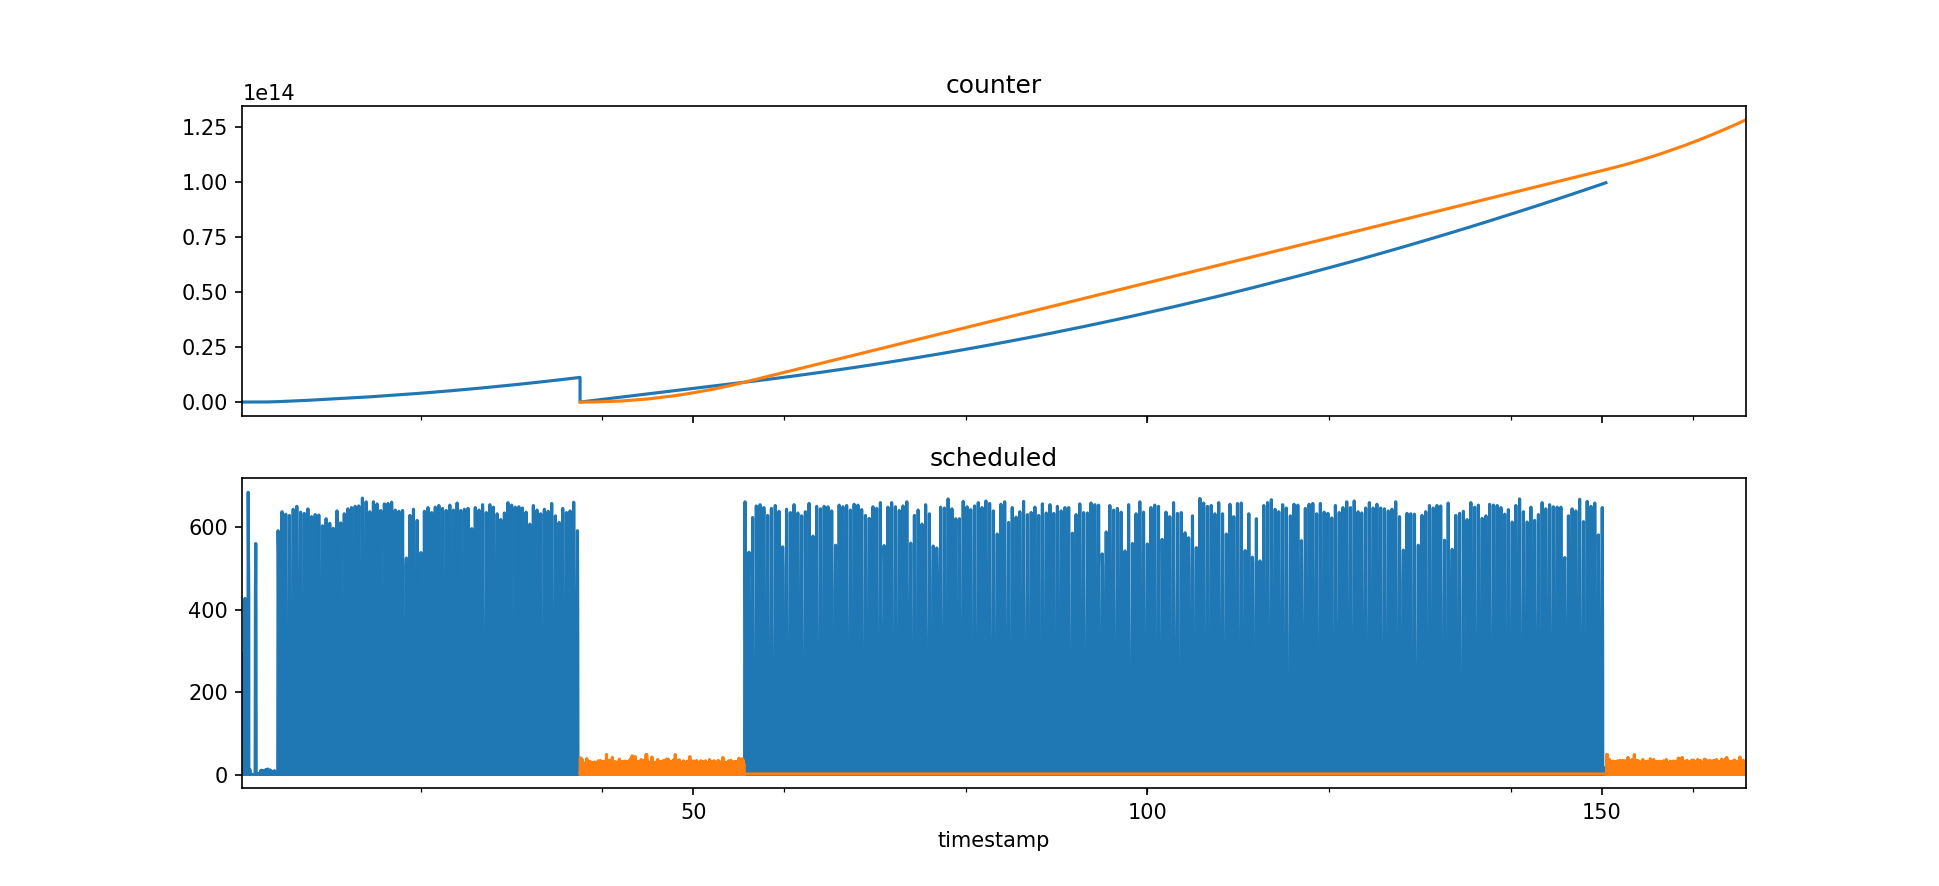

removeZeros: False for counter
removeZeros: True for scheduled


In [4]:
pf.preprocess('nvfellow/case_preemption')
logs = pf.load_file('nvfellow/case_preemption/sessiter.output')
df, fig = pf.session_counters(logs, colnames=['counter', 'scheduled'])

<IPython.core.display.Javascript object>


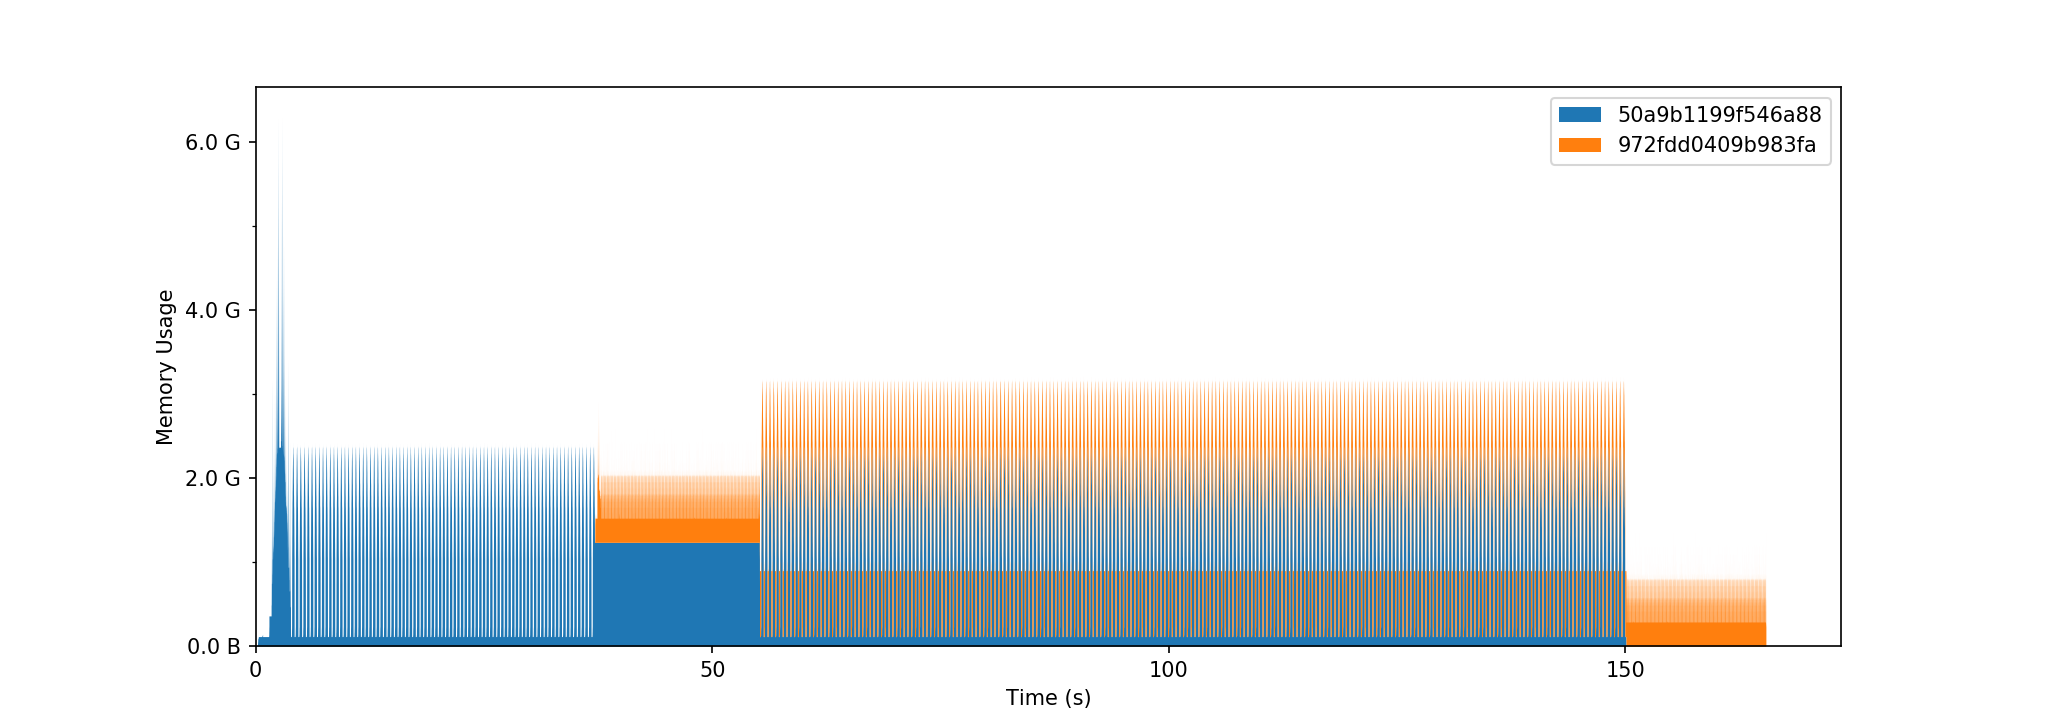

In [5]:
logs = pl.load_file('nvfellow/case_preemption/alloc.output')
df, _, fig = pl.memory_usage(logs, per_sess=True, mem_type='GPU_0_bfc')

<IPython.core.display.Javascript object>


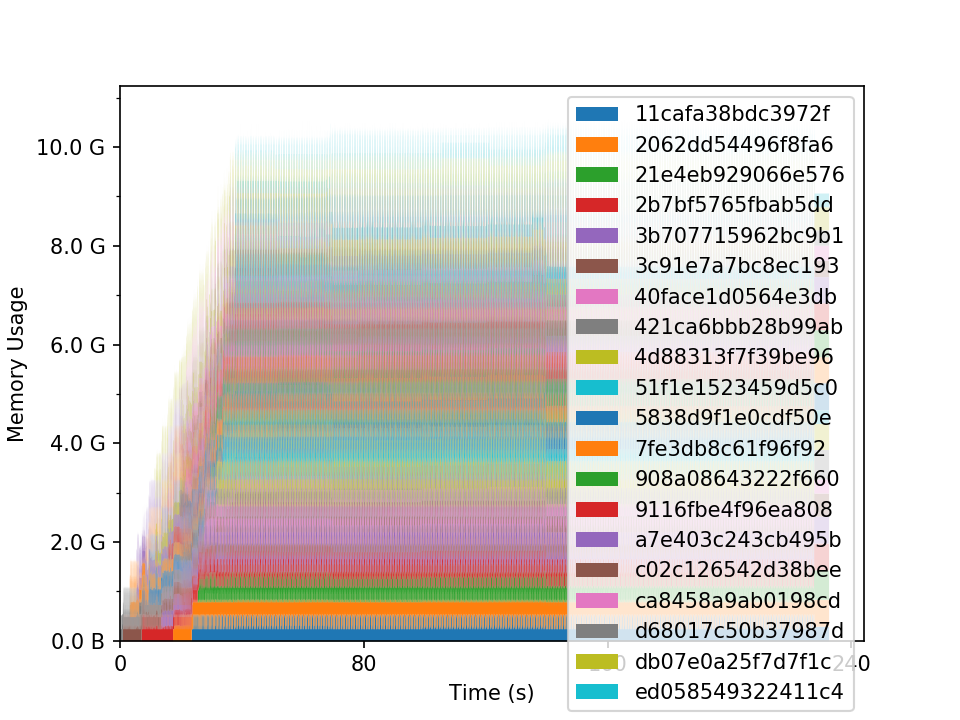

In [6]:
logs = pl.load_file('/gpfs/gpfs0/groups/chowdhury/yiwenzhg/alloc_dir_packing/alloc_r20_nofair.output', parallel_workers=5)
df, _, fig = pl.memory_usage(logs, per_sess=True, mem_type='GPU_0_bfc')

<IPython.core.display.Javascript object>


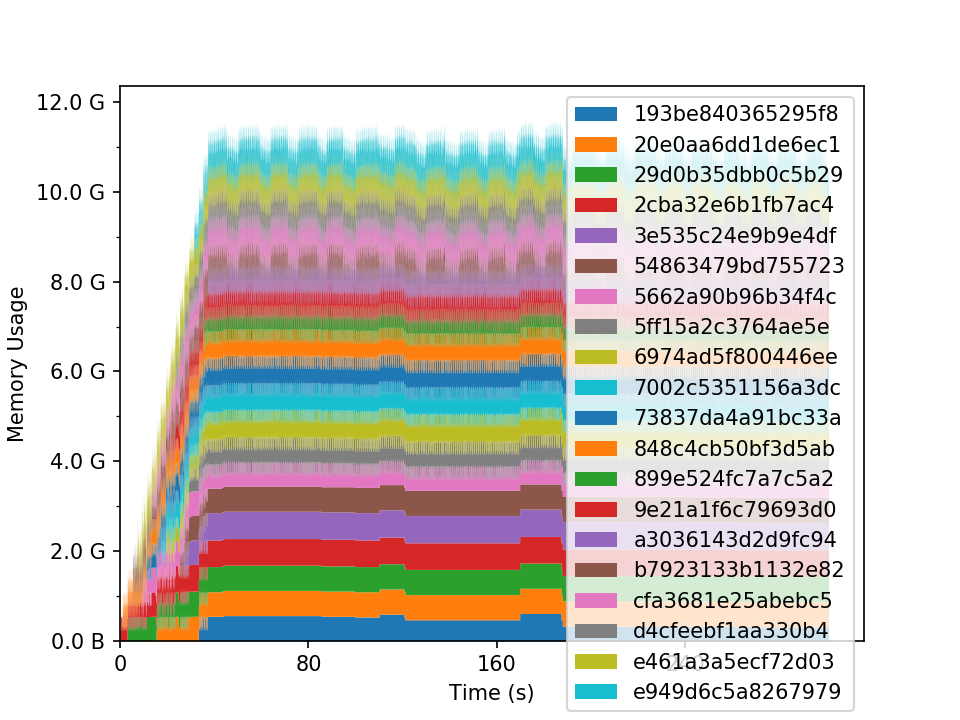

In [2]:
logs = pl.load_file('/gpfs/gpfs0/groups/chowdhury/yiwenzhg/alloc_dir_packing/alloc_r20.output', parallel_workers=5)
df, _, fig = pl.memory_usage(logs, per_sess=True, mem_type='GPU_0_bfc')

In [7]:
logs = pl.load_file('/gpfs/gpfs0/groups/chowdhury/yiwenzhg/alloc_dir_packing/alloc_r10_nofair.output')
df, _, fig = pl.memory_usage(logs, per_sess=True, mem_type='GPU_0_bfc')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


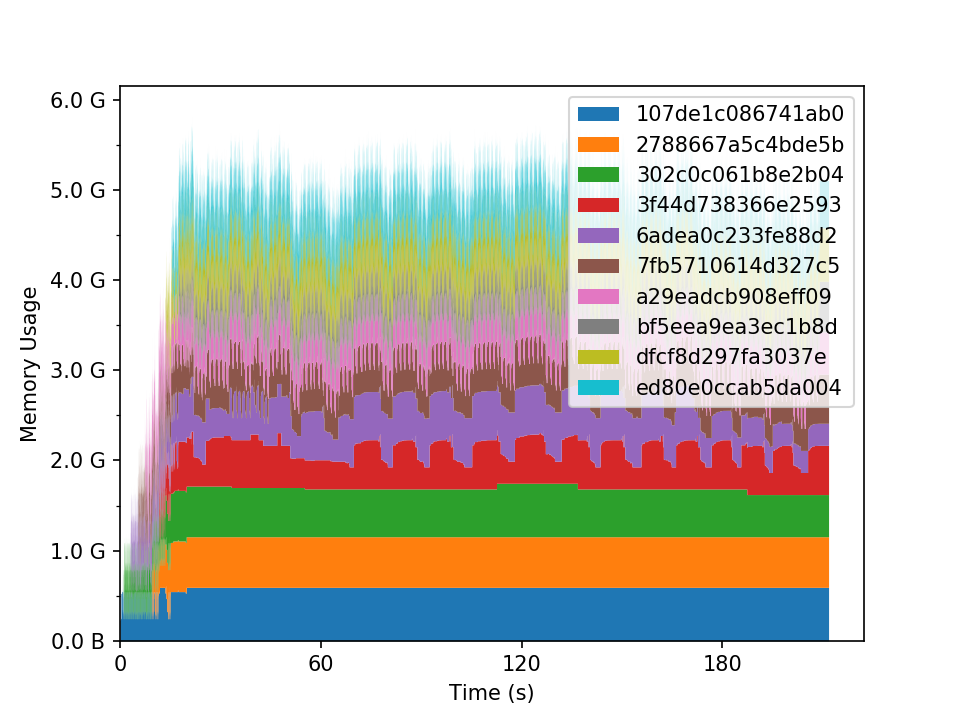

In [7]:
logs = pl.load_file('/gpfs/gpfs0/groups/chowdhury/yiwenzhg/alloc_dir_packing/alloc_r10.output')
df, _, fig = pl.memory_usage(logs, per_sess=True, mem_type='GPU_0_bfc')